In [13]:
import pandas as pd
import pyreadstat


In [14]:
df = pd.read_sas("shared_data_read_only/Data/DHS/GH_1988_DHS/GHBR02SD/GHBR02FL.SAS7BDAT")

In [15]:
print(df.columns)

Index(['CASEID', 'BIDX', 'V000', 'V001', 'V002', 'V003', 'V004', 'V005',
       'V006', 'V007',
       ...
       'SGUW6', 'SGUW7', 'SBIL', 'SBIL1', 'SBIL2', 'SBIL3', 'SBIL4', 'SBIL5',
       'SBIL6', 'SBIL7'],
      dtype='object', length=413)


In [16]:

# import pandas as pd


# df = pd.read_sas('../shared_data_read_only/Data/DHS/GH_1988_DHS/GHBR02SD/GHBR02FL.SAS7BDAT')


# map_file = '../shared_data_read_only/Data/DHS/GH_1993_DHS/GHBR31SD/GHBR31FL.frq'


# metadata = []


# with open(map_file, 'r') as file:
#     for line in file:
        

#         parts = line.strip().split()


#         var_name = parts[0]  # Variable name
#         length = int(parts[1])  # Length
#         decimals = int(parts[2])  # Decimal points
#         type_flag = parts[4]  # Data type
#         label = ' '.join(parts[6:])  # The label part which is likely multiple words


#         metadata.append({
#             'Variable': var_name,
#             'Length': length,
#             'Decimals': decimals,
#             'Type': type_flag,
#             'Label': label
#         })


# metadata_df = pd.DataFrame(metadata)

# print(df.head())




In [17]:
# df, meta = pyreadstat.read_sas7bdat("../shared_data_read_only/Data/DHS/GH_1993_DHS/GHBR31SD/GHBR31FL.SAS7BDAT")
# print(meta)

In [18]:
df = pd.read_sas("shared_data_read_only/Data/DHS/GH_1988_DHS/GHBR02SD/GHBR02FL.SAS7BDAT")

cols = ['V012', 
        'V013' ,
        'V113', 
        'V206', 
        # 'V175',
        # 'V022',
        # 'V367A',
        # 'S001',
        # 'S704',
        'V106',
        # 'V213',
        'V101',
        # 'V424L',
        'V108'
       ]

df = df[cols]

lookup = {
    'V012':  'Current age',
    'V013': 'Age 5-year groups',
    'V113': 'Source of drinking water',
    'V206': 'Sons who have died',
    'V106': 'Highest educational level',
    'V101': 'Region',
    'V108': 'Literacy',
    'V119': 'Has electricity',
    'V120': 'Has radio',
    'V121': 'Has television',
    'V122': 'Has refrigerator',
    'V123': 'Has bicycle',
    'V124': 'Has motorcycle',
    'V125': 'Has car',
    # 'V424L': 'Private Doctor' 
}

df = df.rename(columns = lookup)



<Figure size 1000x600 with 0 Axes>

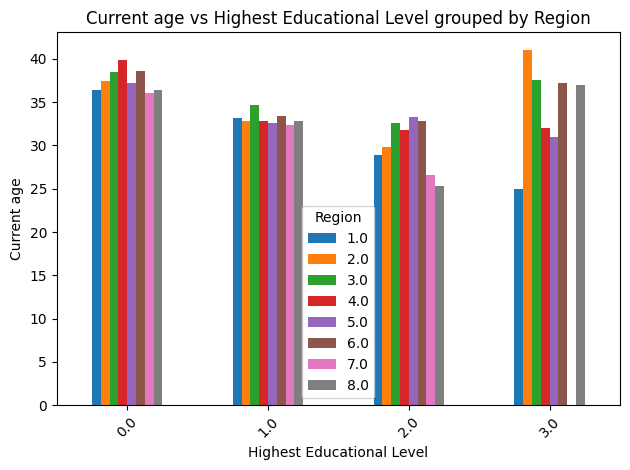

<Figure size 1000x600 with 0 Axes>

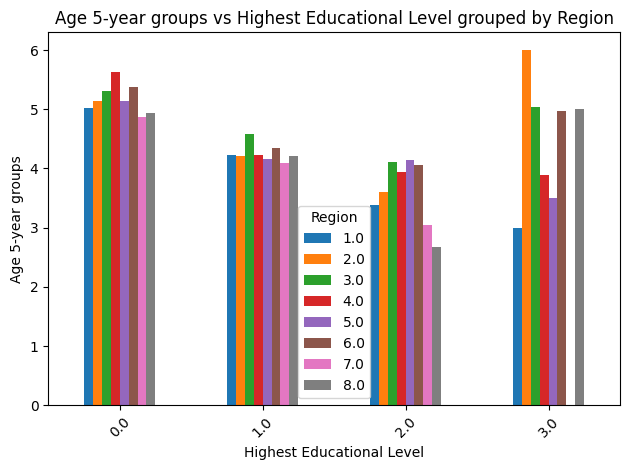

<Figure size 1000x600 with 0 Axes>

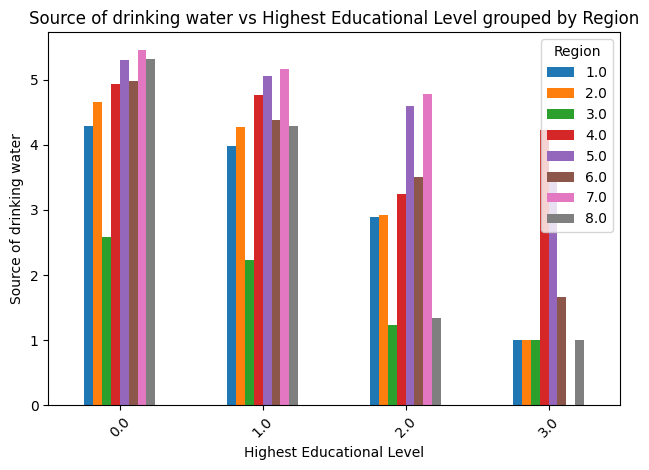

<Figure size 1000x600 with 0 Axes>

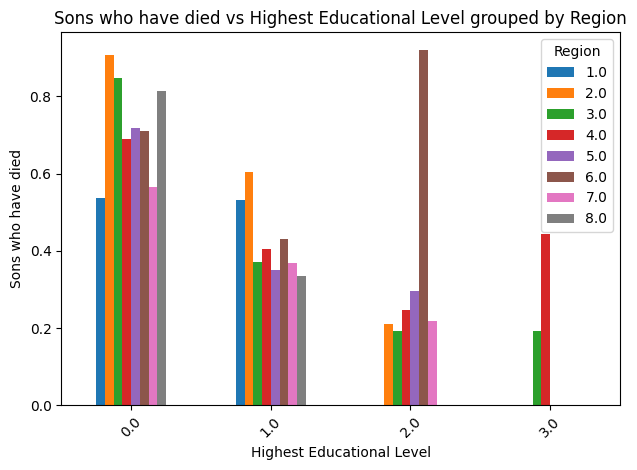

<Figure size 1000x600 with 0 Axes>

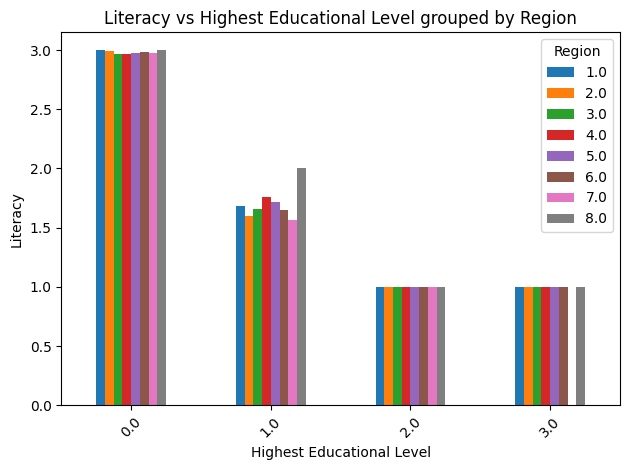

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = df[df['Region'].isin(['Upper East', 'Northern'])]
# Assuming 'df' is your DataFrame and it has a 'Region' column
for col in df.columns:
    if col != 'Highest educational level' and col != 'Region':
        # Group by both 'Highest educational level' and 'Region' and calculate the mean for each group
        grouped_data = df.groupby(['Highest educational level', 'Region'])[col].mean().unstack()

        # Plotting the grouped bar chart
        plt.figure(figsize=(10, 6))
        grouped_data.plot(kind='bar')
        plt.title(f'{col} vs Highest Educational Level grouped by Region')
        plt.ylabel(col)
        plt.xlabel('Highest Educational Level')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


,HWCASEID,HWLINE,HWLEVEL,HC70,HC71,HC72,HC73
0,b' 12 96 3',1.0,2.0,-86.0,-20.0,34.0,48.0
1,b' 12108 2',1.0,2.0,-309.0,-182.0,-8.0,5.0
2,b' 12121 2',1.0,2.0,-55.0,-112.0,-113.0,-113.0
3,b' 12133 2',1.0,2.0,8.0,59.0,74.0,75.0
4,b' 12158 1',1.0,2.0,-4.0,55.0,76.0,78.0
...,...,...,...,...,...,...,...
2200,b' 1505207 3',1.0,2.0,5.0,-117.0,-166.0,-175.0
2201,b' 1505249 2',1.0,2.0,-189.0,-84.0,29.0,51.0
2202,b' 1505333 2',1.0,2.0,-202.0,-256.0,-207.0,-187.0
2203,b' 1505375 5',2.0,2.0,-265.0,-203.0,-63.0,-38.0
